
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 400.  Construct portfolios from the 400 stocks in the S&P 400 mid cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp400-galaxy']
risk_free_rate = 0
annual_returns = '3 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,ACHC,Acadia Healthcare,US Stocks:Healthcare,567.50,329.73,33.50,10.68,-8.28,28.43,8.67,48.59,10.68,0.22
1,ACIW,ACI Worldwide,US Stocks:Technology,1523.43,216.92,7.74,20.19,11.01,50.92,20.63,31.59,20.19,0.64
2,ATGE,Adtalem Global Education,US Stocks:Consumer Discretionary,529.81,-38.79,-10.74,-10.31,4.77,37.11,15.04,36.94,-10.31,-380.85
3,ACM,AECOM,US Stocks:Industrials,411.82,220.27,22.30,10.55,10.20,29.59,16.12,36.01,10.55,0.29
4,AMG,Affiliated Managers Group,US Stocks:Financials,1023.11,228.53,14.54,-20.85,-10.44,38.99,17.77,33.58,-20.85,-700.14
5,ACC,American Campus Communities,US Stocks:Real Estate,344.24,110.41,-6.87,4.55,6.35,23.52,11.62,31.36,4.55,0.15
6,AEO,American Eagle Outfitters,US Stocks:Consumer Discretionary,3458.20,391.71,30.31,8.50,7.94,60.21,18.61,43.87,8.50,0.19
7,AFG,American Financial Group,US Stocks:Financials,755.81,220.73,-14.50,-1.13,8.75,44.22,19.35,26.89,-1.13,-30.39
8,AGCO,AGCO,US Stocks:Industrials,82.46,130.35,20.37,8.93,13.73,31.35,16.47,30.61,8.93,0.29
9,ALE,ALLETE Inc.,US Stocks:Utilities,233.66,47.44,-23.90,-6.95,7.57,46.90,21.35,19.82,-6.95,-137.75


In [6]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=1)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered = rank_filtered.head(20)
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
366,WTRG,Essential Utilities,US Stocks:Utilities,499.36,74.76,7.64,10.58,12.81,33.42,16.81,19.83,10.58,0.53
119,FICO,Fair Isaac Corporation,US Stocks:Technology,291.13,93.69,37.08,46.84,39.99,37.22,12.70,32.22,46.84,1.45
208,MPW,Medical Properties Trust Inc,US Stocks:Real Estate,174.62,65.48,1.83,21.19,19.43,24.92,12.86,21.54,21.19,0.98
20,ATR,AptarGroup Inc,US Stocks:Materials,131.59,35.43,15.47,14.66,13.28,19.26,8.50,16.62,14.66,0.88
137,GNRC,Generac Holdings Inc.,US Stocks:Industrials,-64.00,74.81,107.84,61.47,45.53,34.03,20.56,32.50,61.47,1.89
270,RGEN,Repligen,US Stocks:Healthcare,9.79,181.46,112.99,76.35,46.68,50.14,30.45,35.28,76.35,2.16
33,BRO,Brown & Brown,US Stocks:Financials,-24.86,-3.03,18.45,21.43,23.98,18.19,8.50,19.49,21.43,1.10
164,INT,World Fuel Services Corp,US Stocks:Energy,7397.50,121.96,-28.16,3.82,-5.29,103.23,40.21,47.51,3.82,0.08
281,SAM,Boston Beer Company,US Stocks:Consumer Staples,-66.69,77.19,144.23,71.41,35.13,56.15,42.03,47.31,71.41,1.51
90,DECK,Deckers Outdoor Corporation,US Stocks:Consumer Discretionary,233.45,359.98,75.56,55.34,42.19,40.15,22.42,31.79,55.34,1.74


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': None},
    'Investment Option': {'weight_by': 'DS Vola'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,WTRG,FICO,MPW,ATR,GNRC,RGEN,BRO,INT,SAM,DECK,CABO,Ranked Portfolio
Annual Returns,10.58,46.84,21.19,14.66,61.47,76.35,21.43,3.82,71.41,55.34,45.43,38.96
Std Dev,19.83,32.22,21.54,16.62,32.50,35.28,19.49,47.51,47.31,31.79,24.09,27.05
Sharpe Ratio,0.53,1.45,0.98,0.88,1.89,2.16,1.10,0.08,1.51,1.74,1.89,1.44
Weight,0.08,0.11,0.11,0.17,0.07,0.05,0.17,0.04,0.03,0.06,0.12,1.00
Worst Typical Down Year,-29.08,-17.60,-21.89,-18.58,-3.53,5.79,-17.55,-91.20,-23.21,-8.24,-2.75,-15.14
Black Swan,-48.91,-49.82,-43.43,-35.20,-36.03,-29.49,-37.04,-138.71,-70.52,-40.03,-26.84,-42.19


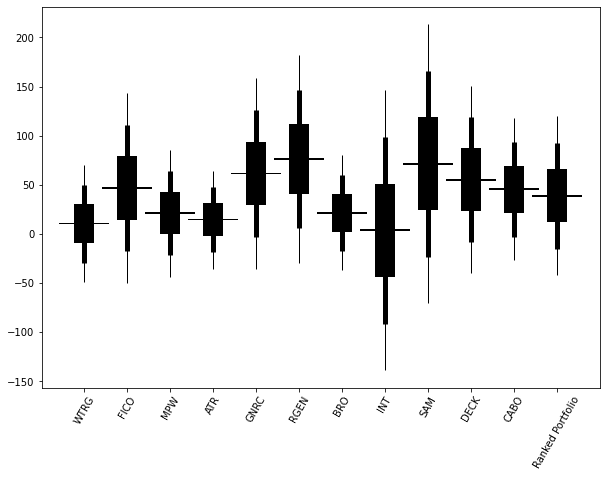

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

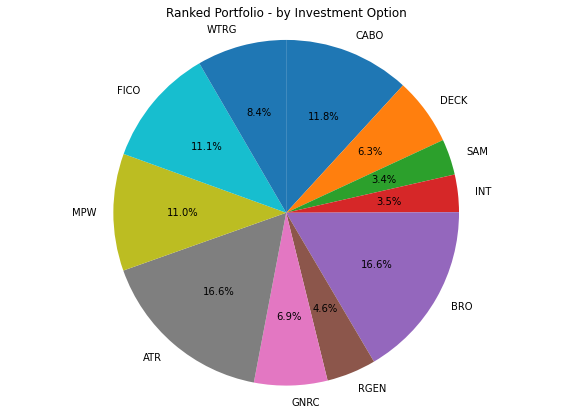

CABO   0.17
DECK   0.17
SAM    0.12
INT    0.06
BRO    0.11
RGEN   0.07
GNRC   0.04
ATR    0.11
MPW    0.05
FICO   0.03
WTRG   0.08



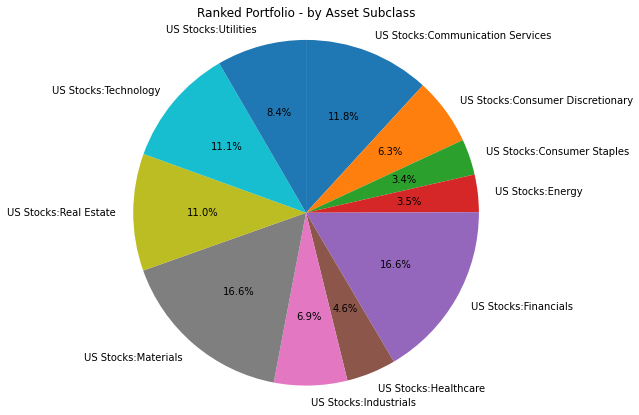

US Stocks:Communication Services   0.12
US Stocks:Consumer Discretionary   0.06
US Stocks:Consumer Staples         0.03
US Stocks:Energy                   0.04
US Stocks:Financials               0.17
US Stocks:Healthcare               0.05
US Stocks:Industrials              0.07
US Stocks:Materials                0.17
US Stocks:Real Estate              0.11
US Stocks:Technology               0.11
US Stocks:Utilities                0.08



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    WTRG                           0.0838
    FICO                           0.1109
    MPW                            0.1095
    ATR                            0.1657
    GNRC                           0.0685
    RGEN                           0.0463
    BRO                            0.1657
    INT                            0.0350
    SAM                            0.0335
    DECK                           0.0628
    CABO                           0.1181


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer.......

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.98
    annual_return              56.37
    std_dev                    28.49
    worst typical down year    -0.62
    black_swan                -29.11


Ranked Portfolio Weights:
    WTRG                           0.0500
    FICO                           0.0600
    MPW                            0.0000
    ATR                            0.0000
    GNRC                           0.2000
    RGEN                           0.2300
    BRO                            0.0000
    INT                            0.0000
    SAM                            0.0000
    DECK                           0.2300
    CABO                           0.2300



### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).